# Benford's Law Variable

Homework 7

In [47]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load in the data. 

This clean data set has the largest amount outlier removed and only has transaction with trasntype 'P'.

In [48]:
mydata = pd.read_csv('clean_card_transactions.csv')

In [49]:
mydata.drop(['Unnamed: 0'], axis=1, inplace=True)

In [50]:
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


Remove all transactions from Fedex.

In [51]:
mydata['FEDEX'] = mydata['Merch description'].str.extract(r'(FEDEX)', expand=False).str.strip()

In [52]:
mydata = mydata[mydata['FEDEX'].isnull()]
mydata.drop(['FEDEX'], axis=1, inplace=True)
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0


## Find First Number of Amount

In [53]:
mydata.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip             object
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [54]:
mydata['Amount_str'] = mydata['Amount'].astype(str)

In [55]:
mydata['Amount_first_digit'] = mydata['Amount_str'].str.extract(r'([1-9])', expand=False).str.strip()

In [56]:
mydata['Amount_first_digit'] = mydata['Amount_first_digit'].astype(int)

In [57]:
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_str,Amount_first_digit
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,31.42,3
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,178.49,1
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,230.32,2
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,62.11,6
13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0,106.89,1


In [58]:
mydata[mydata['Amount'] < 1].head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_str,Amount_first_digit
344,347,5142290694,2010-01-04,8980627627,AURORA ARTSTC IMPRNTS LTD,CO,80012.0,P,0.50,0,0.5,5
1842,1848,5142163897,2010-01-10,485890006NOT0,CARLSON ELECTRIC MOTOR,NV,89101.0,P,0.17,0,0.17,1
6029,6039,5142150217,2010-01-27,9900000034106,GSA/CUST SUPPLY CTR 94,PA,19107.0,P,0.85,0,0.85,8
6175,6185,5142131721,2010-01-28,9104074610001,STAPLES #741,VA,22314.0,P,0.91,0,0.91,9
6270,6280,5142137416,2010-01-28,2603800006005,PROFESS OFC ENTERPRISES,VA,22304.0,P,0.37,0,0.37,3


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9')]

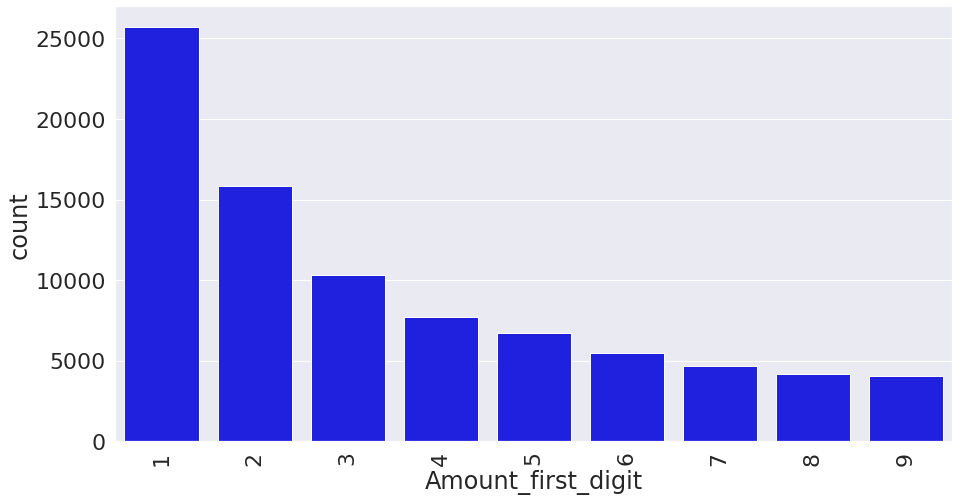

In [59]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Amount_first_digit', data = mydata, color="blue", order=mydata['Amount_first_digit'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

Group the first digit as low or high.

In [14]:
mydata['high_low'] = np.where(mydata['Amount_first_digit'] <=2 , 'low', 'high')
mydata['high_binary'] = np.where(mydata['Amount_first_digit'] <=2 , '0', '1')
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_str,Amount_first_digit,high_low,high_binary
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,31.42,3,high,1
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,178.49,1,low,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,230.32,2,low,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,62.11,6,high,1
13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0,106.89,1,low,0


Let's check to see if the proportion/ratio is similar to the ones given in the slides.

In [15]:
mydata['high_low'].value_counts()

high    43098
low     41524
Name: high_low, dtype: int64

In [16]:
43098 / 41524

1.0379057894229844

In [17]:
mydata['high_binary'] = mydata['high_binary'].astype(int)

In [18]:
mydata['high_binary'].mean()

0.509300181985772

Drop certain values I have but the professor does not in his data set. See the sidenote at the bottom of the file for ellaboration.

In [ ]:
sidenote_data = mydata.copy()

In [20]:
mydata.drop(mydata[(mydata['Merchnum'] == '991808369338') & (mydata['Merch description'] != 'SOCIETY OF TOXICOLOGY')].index, inplace=True)

## Card Number 

Group transactions by card number.


In [21]:
groupedby_cardnum = mydata.copy()
groupedby_cardnum = pd.DataFrame(groupedby_cardnum.groupby(['Cardnum'])['Recnum'].count()).reset_index()
groupedby_cardnum.head()

,Cardnum,Recnum
0,5142110081,4
1,5142110313,3
2,5142110402,11
3,5142110434,1
4,5142110651,3


In [22]:
groupedby_cardnum = groupedby_cardnum.join(mydata.groupby('Cardnum')['high_binary'].sum(), on='Cardnum', rsuffix='_n_high')
groupedby_cardnum

,Cardnum,Recnum,high_binary
0,5142110081,4,4
1,5142110313,3,1
2,5142110402,11,8
3,5142110434,1,0
4,5142110651,3,3
...,...,...,...
1634,5142310397,1,1
1635,5142310525,4,3
1636,5142310598,2,0
1637,5142310768,4,2


In [23]:
groupedby_cardnum.rename(columns={"Recnum": "n", "high_binary": "n_high"}, inplace=True)
groupedby_cardnum['n_low'] = groupedby_cardnum['n'] - groupedby_cardnum['n_high']
groupedby_cardnum.head()

,Cardnum,n,n_high,n_low
0,5142110081,4,4,0
1,5142110313,3,1,2
2,5142110402,11,8,3
3,5142110434,1,0,1
4,5142110651,3,3,0


In [24]:
groupedby_cardnum['n_high'].replace(0,1, inplace=True)
groupedby_cardnum['n_low'].replace(0,1, inplace=True)

In [25]:
c = 3
n_mid = 15

groupedby_cardnum['R'] = (1.096 * groupedby_cardnum['n_low']) / groupedby_cardnum['n_high']
groupedby_cardnum['1/R'] = 1 / groupedby_cardnum['R']
groupedby_cardnum['U'] = groupedby_cardnum[["R", "1/R"]].max(axis=1)
groupedby_cardnum['t'] = (groupedby_cardnum['n'] - n_mid) / c
groupedby_cardnum['U*'] = 1 + ((groupedby_cardnum['U'] - 1) / (1 + np.exp(-(groupedby_cardnum['t']))))

In [26]:
groupedby_cardnum.sort_values(by='U*', ascending=False)

,Cardnum,n,n_high,n_low,R,1/R,U,t,U*
1176,5142253356,66,5,61,13.371200,0.074788,13.371200,17.000000,13.371199
1540,5142299705,28,3,25,9.133333,0.109489,9.133333,4.333333,9.027976
724,5142197563,149,134,15,0.122687,8.150852,8.150852,44.666667,8.150852
696,5142194617,38,33,5,0.166061,6.021898,6.021898,7.666667,6.019548
1448,5142288241,14,13,1,0.084308,11.861314,11.861314,-0.333333,5.533836
...,...,...,...,...,...,...,...,...,...
1226,5142259676,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894
435,5142163835,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894
205,5142134652,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894
1072,5142240612,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894


In [34]:
grouped_by_card_top_40 = groupedby_cardnum.sort_values(by='U*', ascending=False).head(40)

In [39]:
grouped_by_card_top_40.to_csv('Benfords Law Top 40 Cardnum.csv')

## Merchant Number

In [27]:
groupedby_merchnum = mydata.copy()
groupedby_merchnum = pd.DataFrame(groupedby_merchnum.groupby(['Merchnum'])['Recnum'].count()).reset_index()
groupedby_merchnum.head()

,Merchnum,Recnum
0,003100006NOT6,1
1,004740006ABC6,1
2,005590006PNB6,1
3,014430619 14,1
4,014938913 51,1


In [28]:
groupedby_merchnum = groupedby_merchnum.join(mydata.groupby('Merchnum')['high_binary'].sum(), on='Merchnum', rsuffix='_n_high_merchnum')
groupedby_merchnum

,Merchnum,Recnum,high_binary
0,003100006NOT6,1,1
1,004740006ABC6,1,0
2,005590006PNB6,1,1
3,014430619 14,1,0
4,014938913 51,1,1
...,...,...,...
13078,DU49038320006,1,1
13079,JCPENNE9 CO,3,2
13080,PENNE9 CO #05,1,1
13081,PENNE9 CO #68,1,1


In [29]:
groupedby_merchnum.rename(columns={"Recnum": "n", "high_binary": "n_high"}, inplace=True)
groupedby_merchnum['n_low'] = groupedby_merchnum['n'] - groupedby_merchnum['n_high']
groupedby_merchnum.head()


,Merchnum,n,n_high,n_low
0,003100006NOT6,1,1,0
1,004740006ABC6,1,0,1
2,005590006PNB6,1,1,0
3,014430619 14,1,0,1
4,014938913 51,1,1,0


In [30]:
groupedby_merchnum['n_high'].replace(0,1, inplace=True)
groupedby_merchnum['n_low'].replace(0,1, inplace=True)

In [31]:
c = 3
n_mid = 15

groupedby_merchnum['R'] = (1.096 * groupedby_merchnum['n_low']) / groupedby_merchnum['n_high']
groupedby_merchnum['1/R'] = 1 / groupedby_merchnum['R']
groupedby_merchnum['U'] = groupedby_merchnum[["R", "1/R"]].max(axis=1)
groupedby_merchnum['t'] = (groupedby_merchnum['n'] - n_mid) / c
groupedby_merchnum['U*'] = 1 + ((groupedby_merchnum['U'] - 1) / (1 + np.exp(-(groupedby_merchnum['t']))))

In [32]:
groupedby_merchnum.sort_values(by='U*', ascending=False)

,Merchnum,n,n_high,n_low,R,1/R,U,t,U*
12841,991808369338,181,181,1,0.006055,165.145985,165.145985,55.333333,165.145985
9819,8078200641472,60,1,59,64.664000,0.015465,64.664000,15.000000,64.663981
1948,308904389335,53,53,1,0.020679,48.357664,48.357664,12.666667,48.357515
2347,3523000628102,34,1,34,37.264000,0.026836,37.264000,6.333333,37.199706
9913,808998385332,37,36,1,0.030444,32.846715,32.846715,7.333333,32.825921
...,...,...,...,...,...,...,...,...,...
5836,600660009933,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894
5834,600660007550,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894
5832,600660006280,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894
5830,600660005219,1,1,1,1.096000,0.912409,1.096000,-4.666667,1.000894


In [35]:
grouped_by_merchnum_top_40 = groupedby_merchnum.sort_values(by='U*', ascending=False).head(40)

In [38]:
grouped_by_merchnum_top_40.to_csv('Benfords Law Top 40 Merchnum.csv')

## Sidenote

I am missing the top merchant number. Let's look.

In [47]:
sidenote_data[(sidenote_data['Merchnum'] == '991808369338')]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_str,Amount_first_digit,high_low,high_binary
57,58,5142197563,2010-01-02,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
168,171,5142197563,2010-01-03,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
1125,1130,5142197563,2010-01-07,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
1729,1735,5142197563,2010-01-10,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
2061,2067,5142144277,2010-01-11,991808369338,FTMYR OOM CASHIER CAGE,VA,22211.0,P,200.0,0,200.0,2,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91719,92069,5142197563,2010-12-09,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
94233,94583,5142197563,2010-12-19,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
95138,95489,5142197563,2010-12-22,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
95947,96302,5142197563,2010-12-29,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1


In [46]:
sidenote_data[(sidenote_data['Merchnum'] == '991808369338') & (sidenote_data['Merch description'] == 'SOCIETY OF TOXICOLOGY')]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_str,Amount_first_digit,high_low,high_binary
57,58,5142197563,2010-01-02,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
168,171,5142197563,2010-01-03,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
1125,1130,5142197563,2010-01-07,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
1729,1735,5142197563,2010-01-10,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
3700,3707,5142197563,2010-01-18,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91719,92069,5142197563,2010-12-09,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
94233,94583,5142197563,2010-12-19,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
95138,95489,5142197563,2010-12-22,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1
95947,96302,5142197563,2010-12-29,991808369338,SOCIETY OF TOXICOLOGY,VA,20190.0,P,30.0,0,30.0,3,high,1


In [45]:
sidenote_data[(sidenote_data['Merchnum'] == '991808369338') & (sidenote_data['Merch description'] == 'SOCIETY OF TOXICOLOGY')]['high_binary'].sum()

181